In [27]:
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import MaxPooling1D
from keras.layers import BatchNormalization
from keras.models import Model
from keras.layers import LeakyReLU
from keras.layers import Lambda
from keras.layers import Activation
from keras.layers import Multiply
from keras.layers import GlobalAveragePooling1D
from keras.layers import GlobalMaxPooling1D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Reshape, Flatten, LSTM, Dense, Dropout, Embedding, Bidirectional, GRU
from keras.optimizers import Adam
from keras.layers import AveragePooling1D
from keras.layers import TimeDistributed
from keras.layers import Reshape
import tensorflow as tf
from keras.engine.topology import Layer
from keras import initializers, regularizers
from keras import optimizers
from keras.engine.topology import Layer
from keras import constraints
import pandas as pd
import nltk
from nltk import tokenize
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint
from sklearn import preprocessing
from keras.models import load_model
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#data loading
data=pd.read_csv("/content/drive/MyDrive/IIIT_MIDAS/flipkart_com-ecommerce_sample.csv", encoding= 'unicode_escape')
print(len(data))
data.head()

20000


,product_category_tree,description,brand
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons


In [3]:
#Text Preprocessing
category=[]
description=[]
for i in range(len(data)):
  if type(data['description'][i]) == str :
    category.append(data["product_category_tree"][i].split('>>')[0][2:-1])
    des = re.sub('[^a-zA-Z]', ' ', data['description'][i])
    des = re.sub('[/(){}\[\]\|@,.;_]', ' ', des)
    des = des.lower()
    description.append(des) 

data = pd.DataFrame()
data["category"]=category
data["description"]=description
data.head()    


,category,description
0,Clothing,key features of alisha solid women s cycling s...
1,Furniture,fabhomedecor fabric double sofa bed finish co...
2,Footwear,key features of aw bellies sandals wedges heel...
3,Clothing,key features of alisha solid women s cycling s...
4,Pet Supplies,specifications of sicons all purpose arnica do...


Total No. of Categories : 266


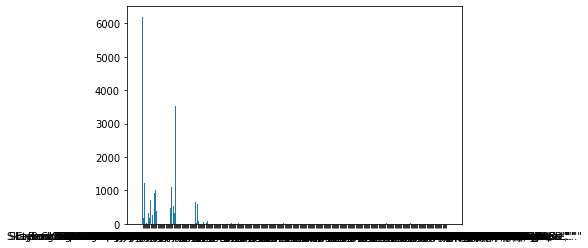

In [4]:
category_counts= Counter(category)
print(f"Total No. of Categories :",len(category_counts.keys()))
plt.bar(category_counts.keys(),category_counts.values())
plt.show() 

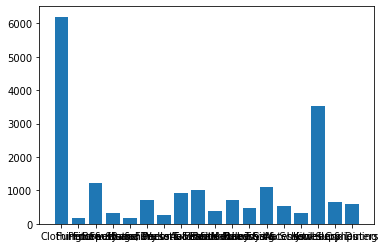

In [5]:
#only keeping the categories with more than 100 samples
new_dict={}
for key, value in category_counts.items():
  if value>100:
    new_dict[key]=value
plt.bar(new_dict.keys(),new_dict.values())
plt.show() 

In [6]:
new_dict

{'Automotive': 1012,
 'Baby Care': 483,
 'Bags, Wallets & Belts': 265,
 'Beauty and Personal Care': 710,
 'Clothing': 6197,
 'Computers': 578,
 'Footwear': 1227,
 'Furniture': 180,
 'Home Decor & Festive Needs': 929,
 'Home Furnishing': 699,
 'Jewellery': 3531,
 'Kitchen & Dining': 647,
 'Mobiles & Accessories': 1099,
 'Pens & Stationery': 313,
 'Sports & Fitness': 166,
 'Tools & Hardware': 391,
 'Toys & School Supplies': 330,
 'Watches': 530}

In [7]:
new_description=[]
new_category=[]
for i in range(len(description)):
  if category[i] in new_dict.keys():
    new_description.append(description[i])
    new_category.append(category[i])
    
new_df=pd.DataFrame()
new_df["description"]=new_description
new_df["category"]=new_category
new_df.head()

,description,category
0,key features of alisha solid women s cycling s...,Clothing
1,fabhomedecor fabric double sofa bed finish co...,Furniture
2,key features of aw bellies sandals wedges heel...,Footwear
3,key features of alisha solid women s cycling s...,Clothing
4,key features of alisha solid women s cycling s...,Clothing


In [8]:
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(new_df.category)
new_df['categorical_label'] = lab_enc.transform(new_df.category)
new_df.head()

,description,category,categorical_label
0,key features of alisha solid women s cycling s...,Clothing,4
1,fabhomedecor fabric double sofa bed finish co...,Furniture,7
2,key features of aw bellies sandals wedges heel...,Footwear,6
3,key features of alisha solid women s cycling s...,Clothing,4
4,key features of alisha solid women s cycling s...,Clothing,4


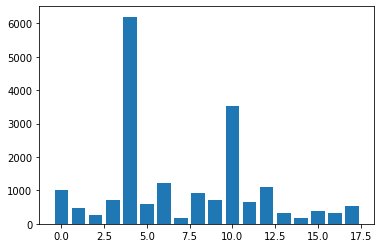

In [9]:
c=Counter(new_df['categorical_label'])
plt.bar(c.keys(),c.values())
plt.show() 

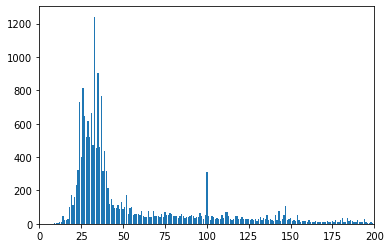

In [10]:
df=new_df["description"]
length=[]
for i in range(len(df)) :
  if type(df[i])==str:
    length.append(len(nltk.word_tokenize(df[i])))
c= Counter(length)
plt.bar(c.keys(),c.values())
plt.xlim(0,200)
plt.show() 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(new_df["description"], new_df["categorical_label"], test_size=0.15, random_state=42)


In [12]:
strategy={0:2500,1:2500,2:2500,3:2500,4:5500,5:2500,6:2500,7:2500,8:2500,9:2500,10:4000,11:2500,12:2500,13:2500,14:2500,15:2500,16:2500,17:2500}
Rand_over_sampling = RandomOverSampler(sampling_strategy=strategy)
X_train, y_train = Rand_over_sampling.fit_resample(np.array(X_train).reshape(-1,1), y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (5500) in class 4 will be larger than the number of samples in the majority class (class #4 -> 5235)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


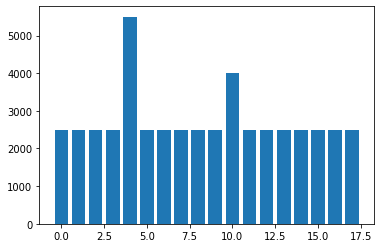

In [13]:
c=Counter(y_train)
plt.bar(c.keys(),c.values())
plt.show() 

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
sent_length=128
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train.reshape(-1))
sequences = tokenizer.texts_to_sequences(X_train.reshape(-1))
word_index = tokenizer.word_index
voc_size = len(tokenizer.word_index) + 1
print("Vocabulary Size:", voc_size)
embedded_docs=pad_sequences(sequences,padding='post',maxlen=sent_length)
X_train=np.array(embedded_docs)

Vocabulary Size: 17079


In [16]:
sequences = tokenizer.texts_to_sequences(X_test)
embedded_docs=pad_sequences(sequences,padding='post',maxlen=sent_length)
X_test=np.array(embedded_docs)    

In [17]:
sequences = tokenizer.texts_to_sequences(X_val.reshape(-1))
embedded_docs=pad_sequences(sequences,padding='post',maxlen=sent_length)
X_val=np.array(embedded_docs)  

In [51]:
#Buiding the LSTM Model for Category Classification
embedding_vector_features=100
input=Input(shape=(sent_length,), name='inputs')
x=Embedding(voc_size,embedding_vector_features,input_length=sent_length)(input)
x=Bidirectional(LSTM(64))(x)
x=BatchNormalization()(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.4)(x)
x=Dense(64,activation='relu')(x)
x=Dense(18,activation='softmax',name='truth_')(x)
model1=Model(inputs=input, outputs=x, name='LSTM')
model1.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model1.summary()
#plot_model(model1,show_layer_names=True,show_shapes=True)

LSTM_save = ModelCheckpoint('/content/drive/MyDrive/IIIT_MIDAS/saved_models/'+'OS_LSTM_18.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 128)]             0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 128, 100)          1707900   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 128)               84480     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
dense_19 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                16448  

In [55]:
model1.fit(x=X_train, y=y_train, validation_data=(X_val,y_val), callbacks=LSTM_save, batch_size=64, epochs=5)

Epoch 1/5
619/619 [==============================] - 20s 32ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0169 - val_accuracy: 0.9961
Epoch 2/5
619/619 [==============================] - 19s 31ms/step - loss: 0.0147 - accuracy: 0.9946 - val_loss: 0.0274 - val_accuracy: 0.9939
Epoch 3/5
619/619 [==============================] - 19s 31ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0206 - val_accuracy: 0.9953
Epoch 4/5
619/619 [==============================] - 20s 32ms/step - loss: 0.0094 - accuracy: 0.9964 - val_loss: 0.0264 - val_accuracy: 0.9935
Epoch 5/5
619/619 [==============================] - 20s 32ms/step - loss: 0.0130 - accuracy: 0.9956 - val_loss: 0.0304 - val_accuracy: 0.9929


In [56]:
print("FOR LSTM MODEL")
saved_model=load_model('/content/drive/MyDrive/IIIT_MIDAS/saved_models/'+'OS_LSTM_18.hdf5')
y_prob = model1.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

FOR LSTM MODEL
Accuracy: 0.961299
Precision: 0.927617
Recall: 0.921101
F1 score: 0.923034


Text(0.5, 1.0, 'CONFUSION MATRIX - LSTM')

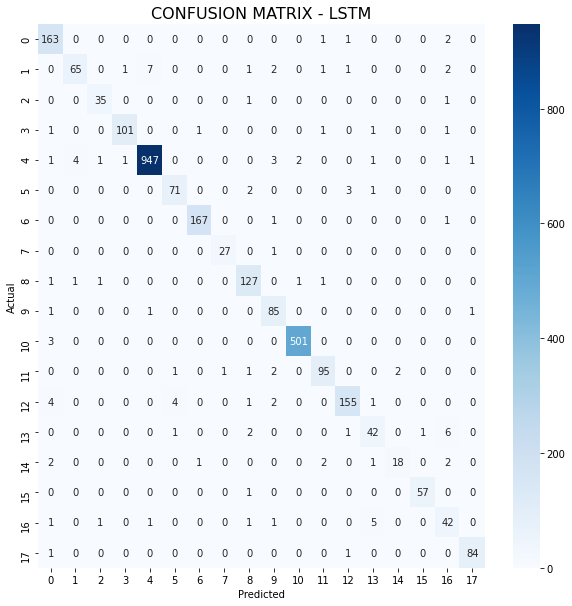

In [57]:
conf_mat = confusion_matrix(lab_enc.inverse_transform(y_test), lab_enc.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LSTM", size=16)

In [41]:
#Building the CNN model
input=Input(shape=(sent_length,))
x=Embedding(voc_size,embedding_vector_features,input_length=sent_length)(input)
x=Conv1D(128, 5, padding='same', activation='relu' )(x)
x=BatchNormalization()(x)
x=MaxPooling1D(pool_size=2,strides=None)(x)
x=Flatten()(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.4)(x)
x=Dense(64,activation='relu')(x)
x=Dense(18,activation='softmax')(x)
model2=Model(inputs=input, outputs=x, name='CNN')
model2.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model2.summary()
#plot_model(model3,show_layer_names=True,show_shapes=True)

CNN_save = ModelCheckpoint('/content/drive/MyDrive/IIIT_MIDAS/saved_models/'+'OS_CNN_18.hdf5', save_best_only=True, monitor='val_loss', mode='min')


Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 128, 100)          1707900   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 128, 128)          64128     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128)          512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 64, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408 

In [42]:
model2.fit(x=X_train, y=y_train, validation_data=(X_val,y_val), callbacks=CNN_save, batch_size=64, epochs =10)

Epoch 1/10
619/619 [==============================] - 14s 21ms/step - loss: 0.8166 - accuracy: 0.7594 - val_loss: 0.0257 - val_accuracy: 0.9948
Epoch 2/10
619/619 [==============================] - 13s 21ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0133 - val_accuracy: 0.9962
Epoch 3/10
619/619 [==============================] - 13s 21ms/step - loss: 0.0136 - accuracy: 0.9948 - val_loss: 0.0328 - val_accuracy: 0.9921
Epoch 4/10
619/619 [==============================] - 13s 21ms/step - loss: 0.0356 - accuracy: 0.9907 - val_loss: 0.0293 - val_accuracy: 0.9947
Epoch 5/10
619/619 [==============================] - 13s 21ms/step - loss: 0.0260 - accuracy: 0.9935 - val_loss: 0.0067 - val_accuracy: 0.9983
Epoch 6/10
619/619 [==============================] - 13s 21ms/step - loss: 0.0058 - accuracy: 0.9976 - val_loss: 0.0093 - val_accuracy: 0.9978
Epoch 7/10
619/619 [==============================] - 13s 21ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0214 - val_accuracy:

In [44]:
print("FOR CNN MODEL")
saved_model=load_model('/content/drive/MyDrive/IIIT_MIDAS/saved_models/'+'OS_CNN_18.hdf5')
y_prob = saved_model.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)


FOR CNN MODEL
Accuracy: 0.972011
Precision: 0.951529
Recall: 0.934902
F1 score: 0.942382


Text(0.5, 1.0, 'CONFUSION MATRIX - CNN')

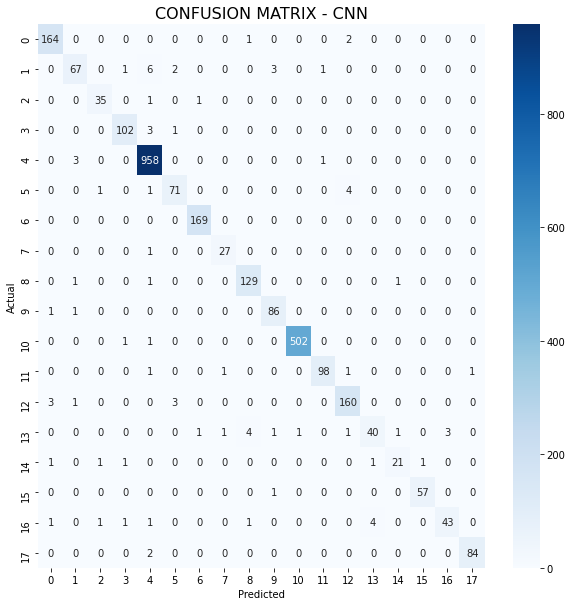

In [45]:
conf_mat = confusion_matrix(lab_enc.inverse_transform(y_test), lab_enc.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - CNN", size=16)

In [46]:
input=Input(shape=(sent_length,), name='inputs')
x=Embedding(voc_size,embedding_vector_features,input_length=sent_length)(input)
x=Conv1D(128, 5, padding='same', activation='relu' )(x)
x=MaxPooling1D(pool_size=2,strides=None)(x)
x=Bidirectional(LSTM(64))(x)
x=BatchNormalization()(x)
x=Flatten()(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.4)(x)
truth=Dense(64,activation='relu')(x)
truth=Dense(18,activation='softmax',name='truth_')(truth)
model3=Model(inputs=input, outputs=truth)
model3.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model3.summary()
#plot_model(model5,show_layer_names=True,show_shapes=True)

CNN_LSTM_save = ModelCheckpoint('/content/drive/MyDrive/IIIT_MIDAS/saved_models/'+'OS_CNN_LSTM_18.hdf5', save_best_only=True, monitor='val_loss', mode='min')


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 128)]             0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 128, 100)          1707900   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 128, 128)          64128     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 64, 128)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 128)               98816     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0   

In [47]:
model3.fit(x=X_train, y=y_train, validation_data=(X_val,y_val), callbacks=CNN_LSTM_save, batch_size=64, epochs =10)

Epoch 1/10
619/619 [==============================] - 21s 30ms/step - loss: 0.7584 - accuracy: 0.7763 - val_loss: 0.0382 - val_accuracy: 0.9887
Epoch 2/10
619/619 [==============================] - 17s 28ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0331 - val_accuracy: 0.9905
Epoch 3/10
619/619 [==============================] - 18s 28ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0179 - val_accuracy: 0.9944
Epoch 4/10
619/619 [==============================] - 17s 28ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0181 - val_accuracy: 0.9953
Epoch 5/10
619/619 [==============================] - 17s 27ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0124 - val_accuracy: 0.9960
Epoch 6/10
619/619 [==============================] - 17s 28ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0145 - val_accuracy: 0.9965
Epoch 7/10
619/619 [==============================] - 17s 28ms/step - loss: 0.0121 - accuracy: 0.9956 - val_loss: 0.0133 - val_accuracy:

In [49]:
#Testing the CNN LSTM model on test dataset
print("FOR CNN LSTM MODEL")
saved_model=load_model('/content/drive/MyDrive/IIIT_MIDAS/saved_models/'+'OS_CNN_LSTM_18.hdf5')
y_prob = saved_model.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

FOR CNN LSTM MODEL
Accuracy: 0.966828
Precision: 0.940791
Recall: 0.928445
F1 score: 0.933398


Text(0.5, 1.0, 'CONFUSION MATRIX - C-LSTM')

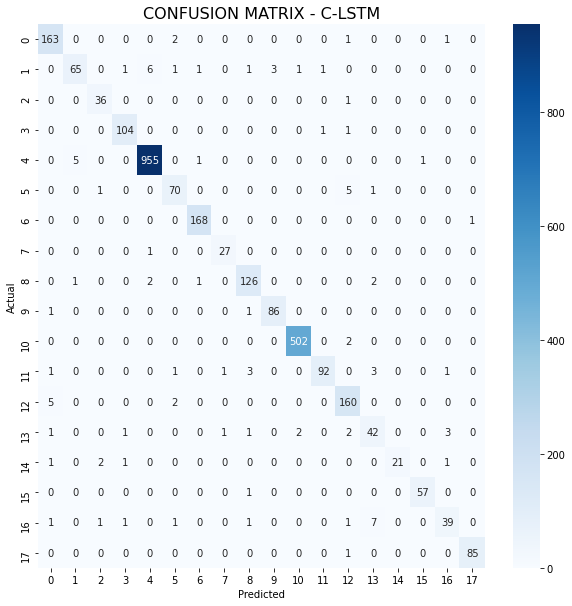

In [50]:

conf_mat = confusion_matrix(lab_enc.inverse_transform(y_test), lab_enc.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - C-LSTM", size=16)